# Dataset

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

C:\Users\CZR\AppData\Local\Temp\ipykernel_16240\3029499816.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Dataset direction

In [2]:
TRAIN_DATA_DIR = 'training_dataset'
VALID_DATA_DIR = 'valid_dataset'
TEST_DATA_DIR = 'test_dataset'

## Reshape dataset image & mask size to 256 x 256

In [3]:
import os, sys
from PIL import Image
from tqdm import tqdm

size = (256, 256)

image_path = 'training_dataset/image/'
image_outpath = 'training_dataset/image_reshape/'
image_names = sorted(next(os.walk(image_path))[-1])

for id in tqdm(range(len(image_names)), desc="Images"):
	path = image_path + image_names[id]
	outpath = image_outpath + image_names[id]
	try:
		im = Image.open(path)
		im = im.resize(size)
		im.save(outpath)
		
	except IOError:
		print("Error occured")
  
image_path = 'training_dataset/mask/'
image_outpath = 'training_dataset/mask_reshape/'
image_names = sorted(next(os.walk(image_path))[-1])

for id in tqdm(range(len(image_names)), desc="Images"):
	path = image_path + image_names[id]
	outpath = image_outpath + image_names[id]
	try:
		im = Image.open(path)
		im = im.resize(size)
		im.save(outpath)
		
	except IOError:
		print("Error occured")
  
image_path = 'valid_dataset/image/'
image_outpath = 'valid_dataset/image_reshape/'
image_names = sorted(next(os.walk(image_path))[-1])

for id in tqdm(range(len(image_names)), desc="Images"):
	path = image_path + image_names[id]
	outpath = image_outpath + image_names[id]
	try:
		im = Image.open(path)
		im = im.resize(size)
		im.save(outpath)
		
	except IOError:
		print("Error occured")

image_path = 'valid_dataset/mask/'
image_outpath = 'valid_dataset/mask_reshape/'
image_names = sorted(next(os.walk(image_path))[-1])

for id in tqdm(range(len(image_names)), desc="Images"):
	path = image_path + image_names[id]
	outpath = image_outpath + image_names[id]
	try:
		im = Image.open(path)
		im = im.resize(size)
		im.save(outpath)
		
	except IOError:
		print("Error occured")


image_path = 'test_dataset/image/'
image_outpath = 'test_dataset/image_reshape/'
image_names = sorted(next(os.walk(image_path))[-1])

for id in tqdm(range(len(image_names)), desc="Images"):
	path = image_path + image_names[id]
	outpath = image_outpath + image_names[id]
	try:
		im = Image.open(path)
		im = im.resize(size)
		im.save(outpath)
		
	except IOError:
		print("Error occured")


image_path = 'test_dataset/mask/'
image_outpath = 'test_dataset/mask_reshape/'
image_names = sorted(next(os.walk(image_path))[-1])

for id in tqdm(range(len(image_names)), desc="Images"):
	path = image_path + image_names[id]
	outpath = image_outpath + image_names[id]
	try:
		im = Image.open(path)
		im = im.resize(size)
		im.save(outpath)
		
	except IOError:
		print("Error occured")




Images: 100%|██████████| 12/12 [00:00<00:00, 206.85it/s]


## Train, valid & test dataset direction 

In [4]:
x_train_dir = os.path.join(TRAIN_DATA_DIR, 'image_reshape')
y_train_dir = os.path.join(TRAIN_DATA_DIR, 'mask_reshape')

x_valid_dir = os.path.join(VALID_DATA_DIR, 'image_reshape')
y_valid_dir = os.path.join(VALID_DATA_DIR, 'mask_reshape')

x_test_dir = os.path.join(TEST_DATA_DIR, 'image_reshape')
y_test_dir = os.path.join(TEST_DATA_DIR, 'mask_reshape')

# Helper function for data visualization

In [5]:
def visualize(**images):
    """PLot images in one row."""
    n = len(images)
    plt.figure(figsize=(16, 5))
    for i, (name, image) in enumerate(images.items()):
        plt.subplot(1, n, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.title(' '.join(name.split('_')).title())
        plt.imshow(image, cmap='gray')
    plt.show()
    

# Dataloader

In [6]:
from torch.utils.data import DataLoader
from torch.utils.data import Dataset as BaseDataset

In [7]:
import os
import cv2
import numpy as np
from torch.utils.data import Dataset

class WaterDataSet(Dataset):
    
    CLASSES = ['water', 'not-water']
    
    def __init__(
            self, 
            images_dir, 
            masks_dir, 
            classes=None, 
            augmentation=None, 
            preprocessing=None,
    ):
        self.ids = os.listdir(images_dir)
        self.images_fps = [os.path.join(images_dir, image_id) for image_id in self.ids]
        self.masks_fps = [os.path.join(masks_dir, image_id) for image_id in self.ids]
        
        # convert str names to class values on masks
        self.class_values = [self.CLASSES.index(cls.lower()) for cls in classes]
        
        self.augmentation = augmentation
        self.preprocessing = preprocessing
    
    def __getitem__(self, i):
        
        # read data
        image = cv2.imread(self.images_fps[i])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        mask = cv2.imread(self.masks_fps[i], 0)
        
        
        # extract certain classes from mask (e.g. cars)
        masks = [(mask != v) for v in self.class_values]
        mask = np.stack(masks, axis=-1).astype('float')
        
        # apply augmentations
        if self.augmentation:
            sample = self.augmentation(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
        
        # apply preprocessing
        if self.preprocessing:
            sample = self.preprocessing(image=image, mask=mask)
            image, mask = sample['image'], sample['mask']
            
        return image, mask
        
    def __len__(self):
        return len(self.ids)

## Look at some data we have

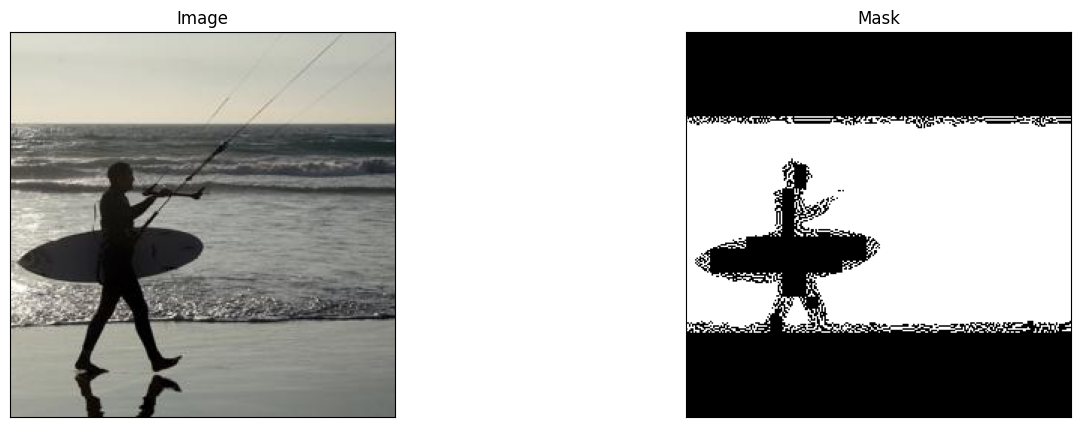

In [8]:
dataset = WaterDataSet(x_train_dir, y_train_dir, classes=['water'])

id = np.random.randint(len(dataset))
image, mask = dataset[id] # get some sample
visualize(
    image=image, 
    mask=mask.squeeze(),
)

In [9]:
import albumentations as albu

In [10]:
def to_tensor(x, **kwargs):
    return x.transpose(2, 0, 1).astype('float32')


def get_preprocessing(preprocessing_fn):
    """Construct preprocessing transform
    Args:
        preprocessing_fn (callbale): data normalization function 
            (can be specific for each pretrained neural network)
    Return:
        transform: albumentations.Compose
    """
    _transform = [
        albu.Lambda(image=preprocessing_fn),
        albu.Lambda(image=to_tensor, mask=to_tensor),
    ]
    return albu.Compose(_transform)

# Create model and train

In [11]:
import torch
import numpy as np
import segmentation_models_pytorch as smp
import segmentation_models_pytorch.utils

c:\Users\CZR\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load pretrained model & decide encoder, encoder_weight, activation function

In [12]:
ENCODER = 'mobilenet_v2'
ENCODER_WEIGHTS = 'imagenet'
CLASSES = ['water']
ACTIVATION = 'sigmoid' 
DEVICE = 'cuda'

# create segmentation model with pretrained encoder
current_model = torch.load("pretrain_model/model_FPN_mobilenet_v2_DiceLoss_best_model40.pth")
current_model_name = "./best_model/model_FPN_mobilenet_v2_DiceLoss_best_model40.pth"

preprocessing_fn = smp.encoders.get_preprocessing_fn(ENCODER, ENCODER_WEIGHTS)

## Load train & valid dataset

In [13]:
train_dataset = WaterDataSet(
    x_train_dir, 
    y_train_dir, 
    augmentation=None, 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

valid_dataset = WaterDataSet(
    x_valid_dir, 
    y_valid_dir, 
    augmentation=None, 
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

train_loader = DataLoader(train_dataset, batch_size=3, shuffle=True, num_workers=0)
valid_loader = DataLoader(valid_dataset, batch_size=1, shuffle=False, num_workers=0)

## Decide loss function, threshold & optimizer 

In [14]:
loss = smp.utils.losses.DiceLoss()
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

optimizer = torch.optim.Adam([ 
    dict(params=current_model.parameters(), lr=0.0001),
])

## Create epoch runners 

In [15]:
train_epoch = smp.utils.train.TrainEpoch(
    current_model, 
    loss=loss, 
    metrics=metrics, 
    optimizer=optimizer,
    device=DEVICE,
    verbose=True,
)

valid_epoch = smp.utils.train.ValidEpoch(
    current_model, 
    loss=loss, 
    metrics=metrics, 
    device=DEVICE,
    verbose=True,
)

## Train model for 40 epochs & save best model

In [16]:
max_score = 0

for i in range(0, 40):
    
    print('\nEpoch: {}'.format(i))
    train_logs = train_epoch.run(train_loader)
    valid_logs = valid_epoch.run(valid_loader)
    
    # do something (save model, change lr, etc.)
    if max_score < valid_logs['iou_score']:
        max_score = valid_logs['iou_score']
        torch.save(current_model, current_model_name)
        print('Model saved!')
        
    if i == 25:
        optimizer.param_groups[0]['lr'] = 1e-5
        print('Decrease decoder learning rate to 1e-5!')


Epoch: 0
valid: 100%|██████████| 20/20 [00:00<00:00, 84.73it/s, dice_loss - 0.4204, iou_score - 0.5093]
Model saved!

Epoch: 1
valid: 100%|██████████| 20/20 [00:00<00:00, 109.26it/s, dice_loss - 0.5188, iou_score - 0.4629]

Epoch: 2
valid: 100%|██████████| 20/20 [00:00<00:00, 110.47it/s, dice_loss - 0.4876, iou_score - 0.4924]

Epoch: 3
valid: 100%|██████████| 20/20 [00:00<00:00, 116.25it/s, dice_loss - 0.4176, iou_score - 0.558] 
Model saved!

Epoch: 4
valid: 100%|██████████| 20/20 [00:00<00:00, 115.58it/s, dice_loss - 0.4131, iou_score - 0.5161]

Epoch: 5
valid: 100%|██████████| 20/20 [00:00<00:00, 117.62it/s, dice_loss - 0.406, iou_score - 0.5164] 

Epoch: 6
valid: 100%|██████████| 20/20 [00:00<00:00, 114.26it/s, dice_loss - 0.4033, iou_score - 0.5218]

Epoch: 7
valid: 100%|██████████| 20/20 [00:00<00:00, 114.92it/s, dice_loss - 0.4162, iou_score - 0.5106]

Epoch: 8
valid: 100%|██████████| 20/20 [00:00<00:00, 114.92it/s, dice_loss - 0.4279, iou_score - 0.5408]

Epoch: 9
valid: 100%

# Test

## Load best saved model

In [17]:
best_model = torch.load(current_model_name)

## Decide loss function & load test dataset

In [18]:
loss = smp.utils.losses.DiceLoss()
metrics = [
    smp.utils.metrics.IoU(threshold=0.5),
]

preprocessing_fn = smp.encoders.get_preprocessing_fn('mobilenet_v2', 'imagenet')
# create test dataset
test_dataset = WaterDataSet(
    x_test_dir, 
    y_test_dir,
    augmentation=None,
    preprocessing=get_preprocessing(preprocessing_fn),
    classes=CLASSES,
)

# test dataset without transformations for image visualization
test_dataset_vis = WaterDataSet(
    x_test_dir, y_test_dir, 
    classes=CLASSES,
)

test_dataloader = DataLoader(test_dataset)

## Create epoch runners 

In [19]:
# evaluate model on test set
test_epoch = smp.utils.train.ValidEpoch(
    model=best_model,
    loss=loss,
    metrics=metrics,
    device=DEVICE,
)
print(best_model)
logs = test_epoch.run(test_dataloader)

FPN(
  (encoder): MobileNetV2Encoder(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU6(inplace=True)
      )
      (1): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU6(inplace=True)
          )
          (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
      )
      (2): InvertedResidual(
        (conv): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(16, 96, kernel_size=(1,

## Visualize predictions

Images:   0%|          | 0/12 [00:00<?, ?it/s]

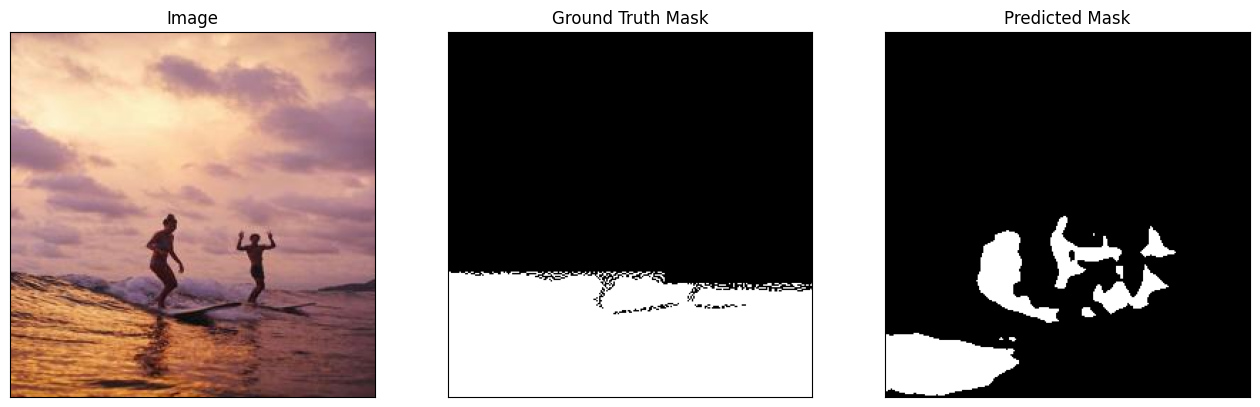

Images:   8%|▊         | 1/12 [00:00<00:01,  5.62it/s]

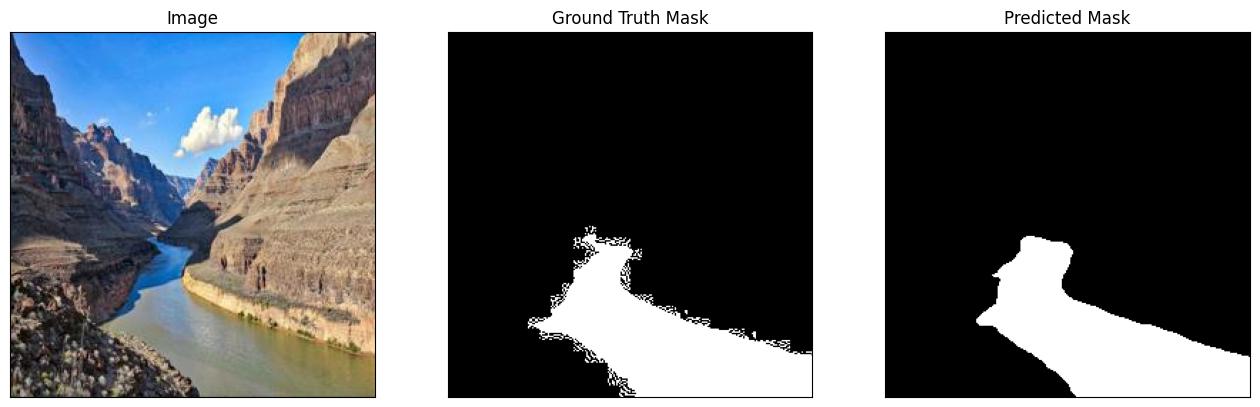

Images:  17%|█▋        | 2/12 [00:00<00:01,  5.75it/s]

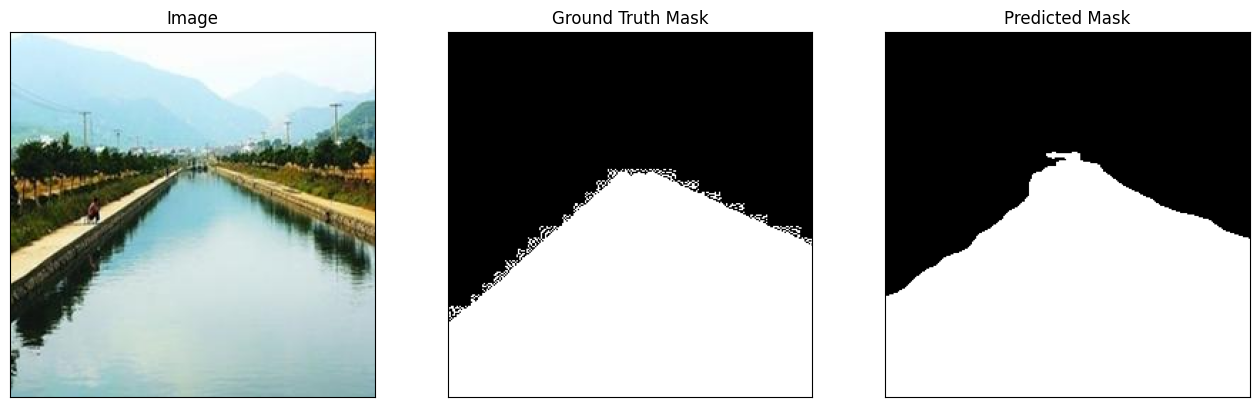

Images:  25%|██▌       | 3/12 [00:00<00:01,  6.22it/s]

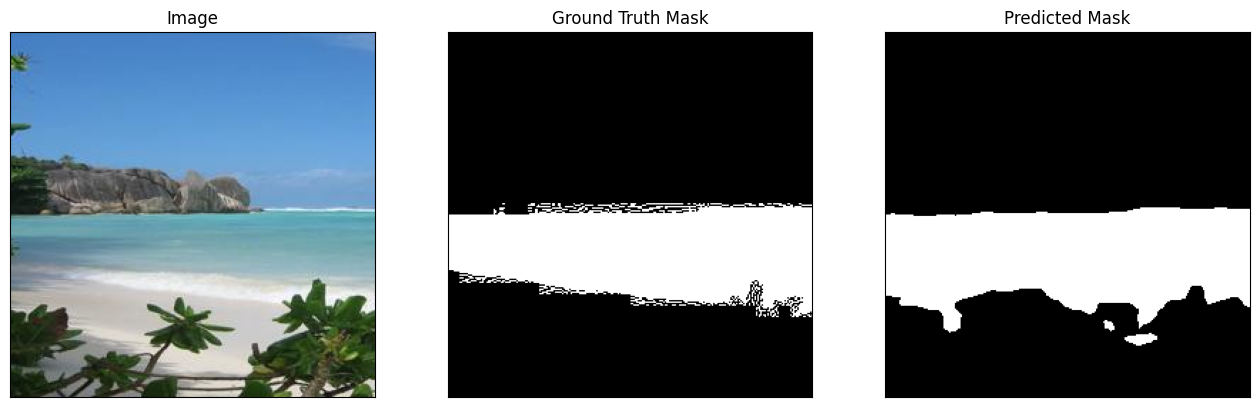

Images:  33%|███▎      | 4/12 [00:00<00:01,  6.56it/s]

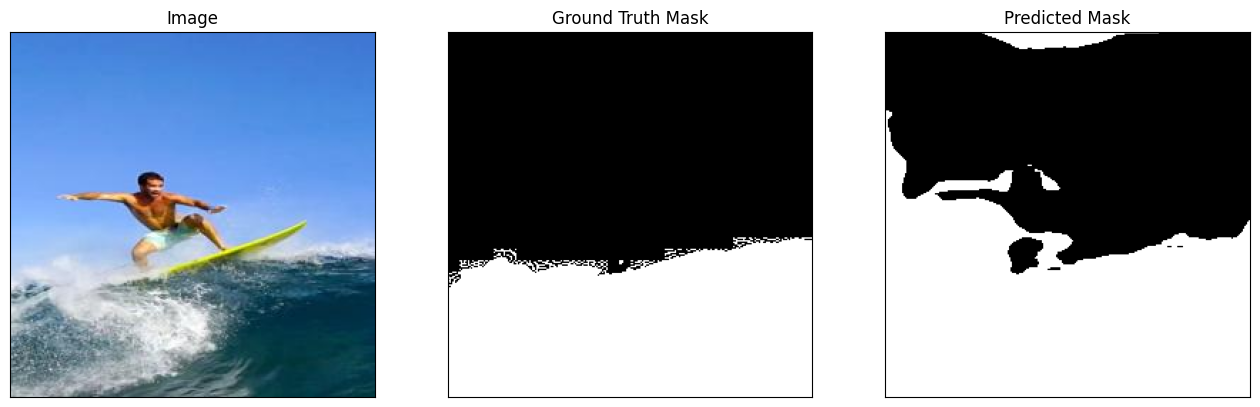

Images:  42%|████▏     | 5/12 [00:00<00:01,  6.74it/s]

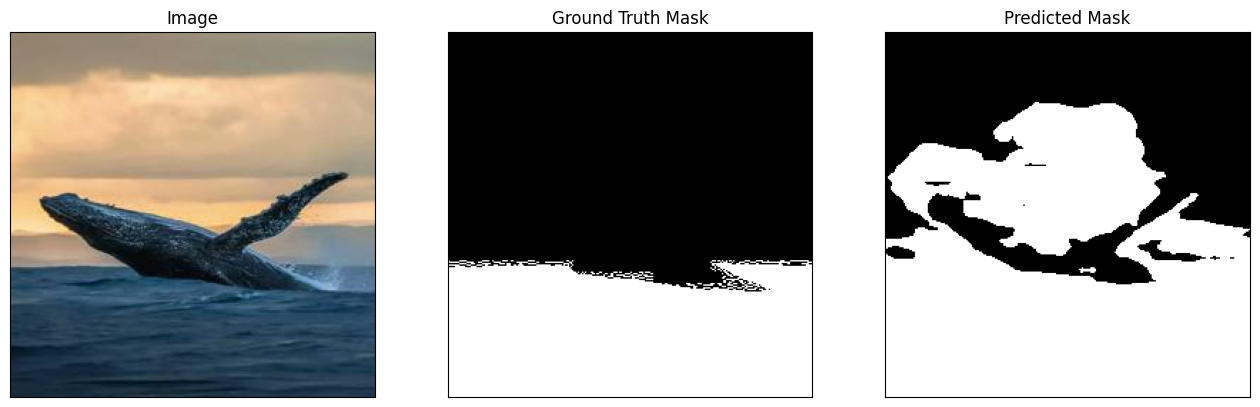

Images:  50%|█████     | 6/12 [00:00<00:00,  6.82it/s]

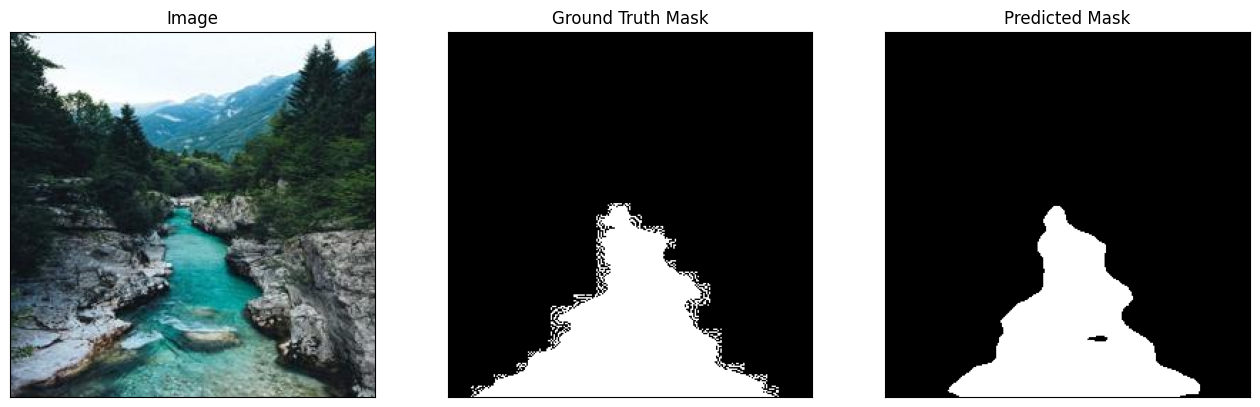

Images:  58%|█████▊    | 7/12 [00:01<00:00,  7.10it/s]

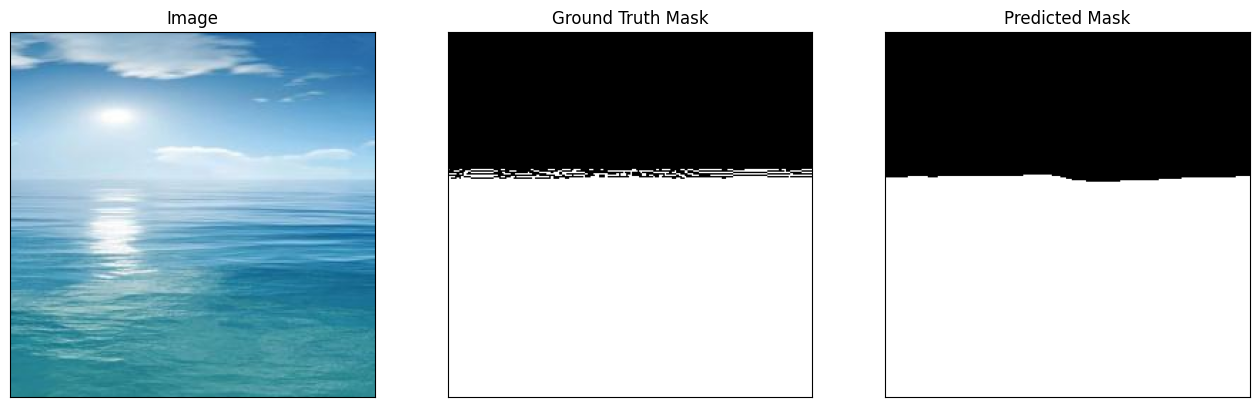

Images:  67%|██████▋   | 8/12 [00:01<00:00,  6.82it/s]

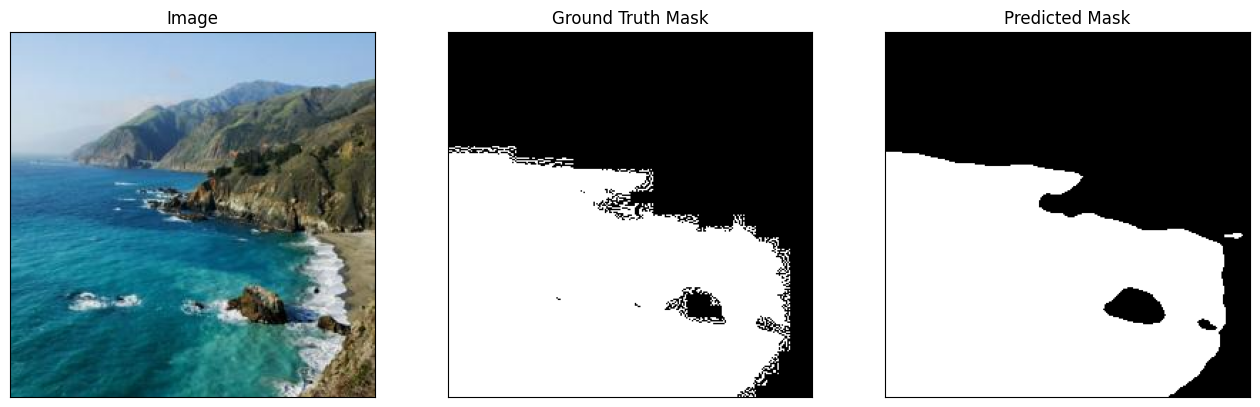

Images:  75%|███████▌  | 9/12 [00:01<00:00,  7.04it/s]

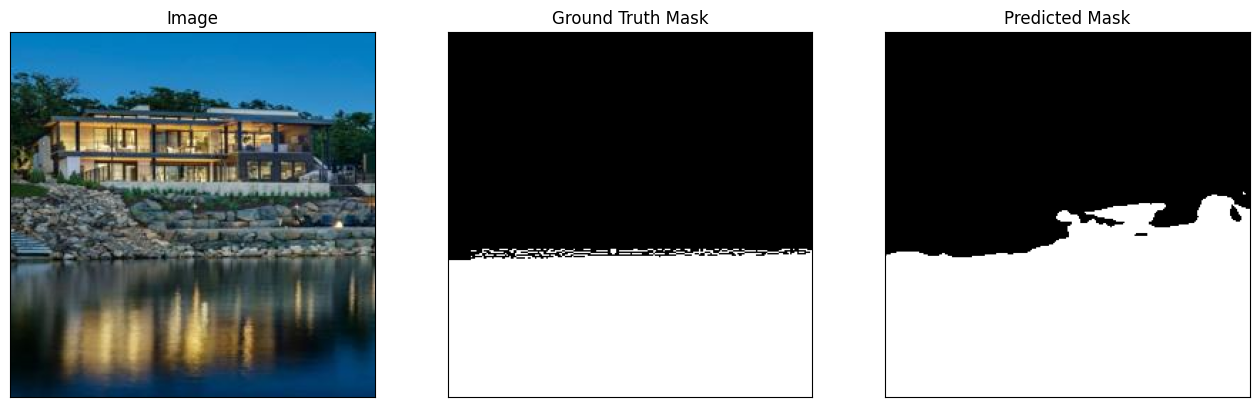

Images:  83%|████████▎ | 10/12 [00:01<00:00,  7.21it/s]

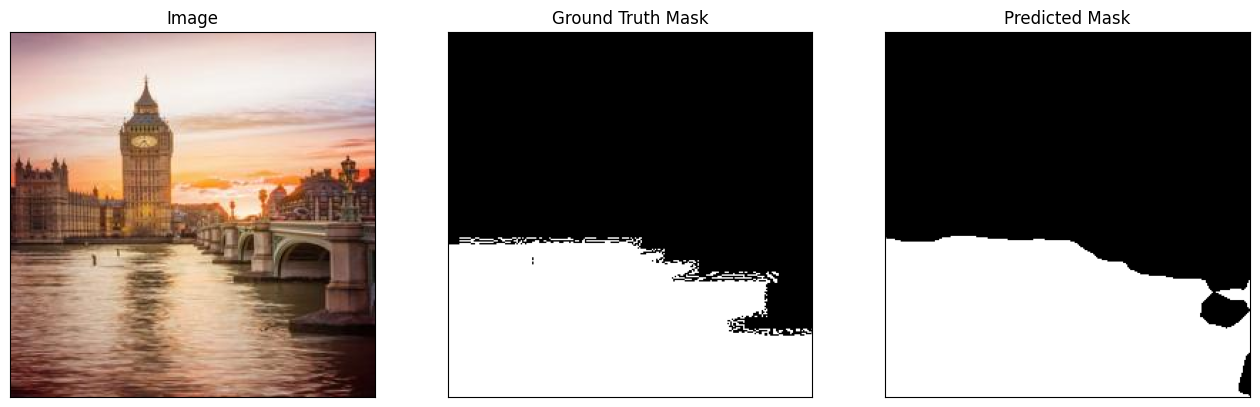

Images:  92%|█████████▏| 11/12 [00:01<00:00,  7.25it/s]

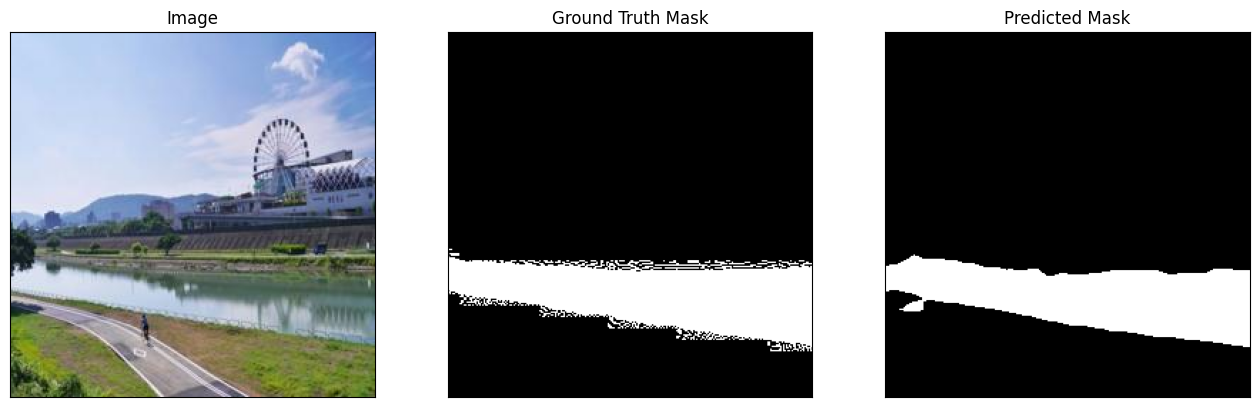

Images: 100%|██████████| 12/12 [00:01<00:00,  6.96it/s]


In [20]:
image_path = 'test_dataset/image/'
image_outpath = 'predict_mask/'
image_names = sorted(next(os.walk(image_path))[-1])

for id in tqdm(range(len(image_names)), desc="Images"):
    path = image_path + image_names[id]
    outpath = image_outpath + test_dataset.ids[id].replace('input', 'output')
    try:
        image_vis = test_dataset_vis[id][0].astype('uint8')
        image, gt_mask = test_dataset[id]
        
        gt_mask = gt_mask.squeeze()
        
        x_tensor = torch.from_numpy(image).to(DEVICE).unsqueeze(0)
        pr_mask = best_model.predict(x_tensor)
        pr_mask = (pr_mask.squeeze().cpu().numpy().round())
        
        visualize(
            image=image_vis, 
            ground_truth_mask=gt_mask, 
            predicted_mask=pr_mask
        )
        
        img = cv2.imread(path)
        height = img.shape[0]
        width = img.shape[1]
        pr_mask = (pr_mask * 255).astype(np.uint8)
        pr_mask = cv2.resize(pr_mask,(width, height))
        cv2.imwrite(outpath, pr_mask)
        
    except IOError:
        print("Error occured")

## Calculate IOU

In [21]:
import cv2
import numpy as np

def calculate_iou(mask1, mask2):
    intersection = np.logical_and(mask1, mask2)
    union = np.logical_or(mask1, mask2)
    iou = np.sum(intersection) / np.sum(union)
    return iou

mask_filenames_1 = ["test_dataset/mask/input1.jpg","test_dataset/mask/input2.jpg","test_dataset/mask/input3.jpg","test_dataset/mask/input4.jpg","test_dataset/mask/input5.jpg","test_dataset/mask/input6.jpg","test_dataset/mask/input7.jpg","test_dataset/mask/input8.jpg","test_dataset/mask/input9.jpg","test_dataset/mask/input10.jpg","test_dataset/mask/input11.jpg","test_dataset/mask/input12.jpg"]

mask_filenames_2 = ["predict_mask/output1.jpg","predict_mask/output2.jpg","predict_mask/output3.jpg","predict_mask/output4.jpg","predict_mask/output5.jpg","predict_mask/output6.jpg","predict_mask/output7.jpg","predict_mask/output8.jpg","predict_mask/output9.jpg","predict_mask/output10.jpg","predict_mask/output11.jpg","predict_mask/output12.jpg"]

total_iou = 0

for i in range(12): 
    mask1 = cv2.imread(mask_filenames_1[i], cv2.IMREAD_GRAYSCALE)
    mask2 = cv2.imread(mask_filenames_2[i], cv2.IMREAD_GRAYSCALE)

    _, mask1 = cv2.threshold(mask1, 128, 255, cv2.THRESH_BINARY)
    _, mask2 = cv2.threshold(mask2, 128, 255, cv2.THRESH_BINARY)

    iou = calculate_iou(mask1, mask2)
    total_iou += iou
    print(f"IoU for pair {i + 1}: {iou}")

average_iou = total_iou / len(mask_filenames_1)
print(f"Average IoU: {average_iou}")


IoU for pair 1: 0.19070361930233934
IoU for pair 2: 0.7650563449806904
IoU for pair 3: 0.5622320810510185
IoU for pair 4: 0.9002750819064104
IoU for pair 5: 0.9891963595716494
IoU for pair 6: 0.9568043925063211
IoU for pair 7: 0.8440526676940729
IoU for pair 8: 0.9159415983114029
IoU for pair 9: 0.8622255655856458
IoU for pair 10: 0.8974400460216445
IoU for pair 11: 0.942600480789507
IoU for pair 12: 0.8346642524896201
Average IoU: 0.8050993741841936
